# 1. Import and Install Dependencies

In [2]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 opencv-python mediapipe sklearn matplotlib

In [3]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic

In [4]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [5]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [6]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [7]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [8]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [9]:
len(results.left_hand_landmarks.landmark)

21

In [10]:
results

mediapipe.python.solution_base.SolutionOutputs

In [11]:
draw_landmarks(frame, results)

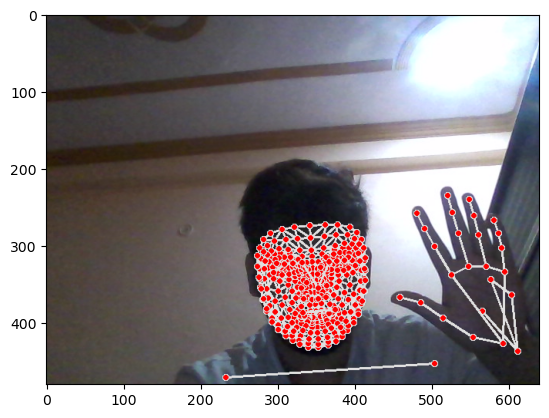

In [12]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values

In [13]:
len(results.left_hand_landmarks.landmark)

21

In [14]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [15]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [16]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [17]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [18]:
result_test = extract_keypoints(results)

In [19]:
result_test

array([ 0.5524497 ,  0.74084437, -0.83052266, ...,  0.        ,
        0.        ,  0.        ])

In [20]:
468*3+33*4+21*3+21*3

1662

In [21]:
np.save('0', result_test)

In [22]:
np.load('0.npy')

array([ 0.5524497 ,  0.74084437, -0.83052266, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection

In [23]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('MP_Data') 

# Actions that we try to detect
actions = np.array(['hello', 'thanks', 'iloveyou'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [24]:
# hello
## 0
## 1
## 2
## ...
## 29
# thanks

# I love you

In [25]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

# 5. Collect Keypoint Values for Training and Testing

In [26]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [27]:
cap.release()
cv2.destroyAllWindows()

# 6. Preprocess Data and Create Labels and Features

In [28]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [29]:
label_map = {label:num for num, label in enumerate(actions)}

In [30]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [31]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [32]:
np.array(sequences).shape

(90, 30, 1662)

In [33]:
np.array(labels).shape

(90,)

In [34]:
X = np.array(sequences)

In [35]:
X.shape

(90, 30, 1662)

In [36]:
y = to_categorical(labels).astype(int)

In [37]:
y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [39]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [41]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [42]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [43]:
res = [.7, 0.2, 0.1]

In [44]:
actions[np.argmax(res)]

'hello'

In [45]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [46]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 4s 73ms/step - loss: 10.6408 - categorical_accuracy: 0.3294
Epoch 2/2000
3/3 [==============================] - 0s 76ms/step - loss: 38.8822 - categorical_accuracy: 0.3765
Epoch 3/2000
3/3 [==============================] - 0s 86ms/step - loss: 427.1157 - categorical_accuracy: 0.4235
Epoch 4/2000
3/3 [==============================] - 0s 77ms/step - loss: 128.3842 - categorical_accuracy: 0.3176
Epoch 5/2000
3/3 [==============================] - 0s 87ms/step - loss: 35.4467 - categorical_accuracy: 0.2824
Epoch 6/2000
3/3 [==============================] - 0s 83ms/step - loss: 33.6023 - categorical_accuracy: 0.3176
Epoch 7/2000
3/3 [==============================] - 0s 87ms/step - loss: 20.9045 - categorical_accuracy: 0.2941
Epoch 8/2000
3/3 [==============================] - 0s 82ms/step - loss: 9.8985 - categorical_accuracy: 0.3294
Epoch 9/2000
3/3 [==============================] - 0s 94ms/step - loss: 6.9551 - categorical_accuracy:

3/3 [==============================] - 0s 135ms/step - loss: 0.3722 - categorical_accuracy: 0.8941
Epoch 74/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.3588 - categorical_accuracy: 0.8588
Epoch 75/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.3219 - categorical_accuracy: 0.8941
Epoch 76/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.3081 - categorical_accuracy: 0.9059
Epoch 77/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.2916 - categorical_accuracy: 0.9176
Epoch 78/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.2710 - categorical_accuracy: 0.9176
Epoch 79/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.2604 - categorical_accuracy: 0.9412
Epoch 80/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.2598 - categorical_accuracy: 0.9294
Epoch 81/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.2333 - categorical_accuracy: 0.92

3/3 [==============================] - 0s 128ms/step - loss: 0.0987 - categorical_accuracy: 0.9647
Epoch 146/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.0957 - categorical_accuracy: 0.9529
Epoch 147/2000
3/3 [==============================] - 0s 127ms/step - loss: 0.1004 - categorical_accuracy: 0.9529
Epoch 148/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.0746 - categorical_accuracy: 0.9882
Epoch 149/2000
3/3 [==============================] - 0s 129ms/step - loss: 0.0804 - categorical_accuracy: 0.9765
Epoch 150/2000
3/3 [==============================] - 0s 131ms/step - loss: 0.0627 - categorical_accuracy: 0.9765
Epoch 151/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.0502 - categorical_accuracy: 0.9882
Epoch 152/2000
3/3 [==============================] - 0s 130ms/step - loss: 0.0690 - categorical_accuracy: 0.9765
Epoch 153/2000
3/3 [==============================] - 0s 134ms/step - loss: 0.0548 - categorical_accura

3/3 [==============================] - 0s 98ms/step - loss: 0.0516 - categorical_accuracy: 0.9882
Epoch 218/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.0744 - categorical_accuracy: 0.9765
Epoch 219/2000
3/3 [==============================] - 0s 109ms/step - loss: 0.2490 - categorical_accuracy: 0.8941
Epoch 220/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.1315 - categorical_accuracy: 0.9412
Epoch 221/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.1122 - categorical_accuracy: 0.9647
Epoch 222/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.0640 - categorical_accuracy: 0.9765
Epoch 223/2000
3/3 [==============================] - 0s 111ms/step - loss: 0.1345 - categorical_accuracy: 0.9412
Epoch 224/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0668 - categorical_accuracy: 0.9882
Epoch 225/2000
3/3 [==============================] - 0s 119ms/step - loss: 0.0683 - categorical_accuracy

3/3 [==============================] - 0s 134ms/step - loss: 0.0210 - categorical_accuracy: 0.9882
Epoch 290/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.0276 - categorical_accuracy: 0.9882
Epoch 291/2000
3/3 [==============================] - 0s 122ms/step - loss: 0.0080 - categorical_accuracy: 1.0000
Epoch 292/2000
3/3 [==============================] - 0s 133ms/step - loss: 0.0730 - categorical_accuracy: 0.9882
Epoch 293/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.0481 - categorical_accuracy: 0.9882
Epoch 294/2000
3/3 [==============================] - 0s 120ms/step - loss: 0.0317 - categorical_accuracy: 0.9882
Epoch 295/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.0337 - categorical_accuracy: 0.9882
Epoch 296/2000
3/3 [==============================] - 0s 124ms/step - loss: 0.0426 - categorical_accuracy: 0.9765
Epoch 297/2000
3/3 [==============================] - 0s 123ms/step - loss: 0.0303 - categorical_accura

3/3 [==============================] - 0s 107ms/step - loss: 0.0269 - categorical_accuracy: 0.9882
Epoch 362/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.0217 - categorical_accuracy: 0.9882
Epoch 363/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.0204 - categorical_accuracy: 0.9882
Epoch 364/2000
3/3 [==============================] - 0s 112ms/step - loss: 0.0192 - categorical_accuracy: 0.9882
Epoch 365/2000
3/3 [==============================] - 0s 115ms/step - loss: 0.0226 - categorical_accuracy: 0.9882
Epoch 366/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.0221 - categorical_accuracy: 1.0000
Epoch 367/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.0272 - categorical_accuracy: 0.9882
Epoch 368/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.0150 - categorical_accuracy: 1.0000
Epoch 369/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.0160 - categorical_accuracy

3/3 [==============================] - 0s 131ms/step - loss: 0.0145 - categorical_accuracy: 1.0000
Epoch 434/2000
3/3 [==============================] - 0s 118ms/step - loss: 0.0152 - categorical_accuracy: 1.0000
Epoch 435/2000
3/3 [==============================] - 0s 150ms/step - loss: 0.0141 - categorical_accuracy: 1.0000
Epoch 436/2000
3/3 [==============================] - 0s 135ms/step - loss: 0.0135 - categorical_accuracy: 1.0000
Epoch 437/2000
3/3 [==============================] - 0s 128ms/step - loss: 0.0123 - categorical_accuracy: 1.0000
Epoch 438/2000
3/3 [==============================] - 0s 137ms/step - loss: 0.0114 - categorical_accuracy: 1.0000
Epoch 439/2000
3/3 [==============================] - 0s 125ms/step - loss: 0.0118 - categorical_accuracy: 1.0000
Epoch 440/2000
3/3 [==============================] - 0s 140ms/step - loss: 0.0109 - categorical_accuracy: 1.0000
Epoch 441/2000
3/3 [==============================] - 0s 136ms/step - loss: 0.0100 - categorical_accura

3/3 [==============================] - 0s 127ms/step - loss: 9.5009e-04 - categorical_accuracy: 1.0000
Epoch 505/2000
3/3 [==============================] - 0s 134ms/step - loss: 8.9615e-04 - categorical_accuracy: 1.0000
Epoch 506/2000
3/3 [==============================] - 0s 132ms/step - loss: 8.6206e-04 - categorical_accuracy: 1.0000
Epoch 507/2000
3/3 [==============================] - 0s 125ms/step - loss: 8.2188e-04 - categorical_accuracy: 1.0000
Epoch 508/2000
3/3 [==============================] - 0s 126ms/step - loss: 8.2558e-04 - categorical_accuracy: 1.0000
Epoch 509/2000
3/3 [==============================] - 0s 133ms/step - loss: 7.9484e-04 - categorical_accuracy: 1.0000
Epoch 510/2000
3/3 [==============================] - 0s 129ms/step - loss: 7.6116e-04 - categorical_accuracy: 1.0000
Epoch 511/2000
3/3 [==============================] - 0s 125ms/step - loss: 7.3374e-04 - categorical_accuracy: 1.0000
Epoch 512/2000
3/3 [==============================] - 0s 128ms/step - l

3/3 [==============================] - 0s 116ms/step - loss: 2.7974e-04 - categorical_accuracy: 1.0000
Epoch 574/2000
3/3 [==============================] - 0s 109ms/step - loss: 2.7822e-04 - categorical_accuracy: 1.0000
Epoch 575/2000
3/3 [==============================] - 0s 98ms/step - loss: 2.6784e-04 - categorical_accuracy: 1.0000
Epoch 576/2000
3/3 [==============================] - 0s 104ms/step - loss: 2.6478e-04 - categorical_accuracy: 1.0000
Epoch 577/2000
3/3 [==============================] - 0s 103ms/step - loss: 2.6688e-04 - categorical_accuracy: 1.0000
Epoch 578/2000
3/3 [==============================] - 0s 116ms/step - loss: 2.5933e-04 - categorical_accuracy: 1.0000
Epoch 579/2000
3/3 [==============================] - 0s 107ms/step - loss: 2.5492e-04 - categorical_accuracy: 1.0000
Epoch 580/2000
3/3 [==============================] - 0s 122ms/step - loss: 2.5312e-04 - categorical_accuracy: 1.0000
Epoch 581/2000
3/3 [==============================] - 0s 128ms/step - lo

3/3 [==============================] - 0s 120ms/step - loss: 1.5508e-04 - categorical_accuracy: 1.0000
Epoch 643/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.5366e-04 - categorical_accuracy: 1.0000
Epoch 644/2000
3/3 [==============================] - 0s 137ms/step - loss: 1.5297e-04 - categorical_accuracy: 1.0000
Epoch 645/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.5329e-04 - categorical_accuracy: 1.0000
Epoch 646/2000
3/3 [==============================] - 0s 114ms/step - loss: 1.5166e-04 - categorical_accuracy: 1.0000
Epoch 647/2000
3/3 [==============================] - 0s 145ms/step - loss: 1.5126e-04 - categorical_accuracy: 1.0000
Epoch 648/2000
3/3 [==============================] - 0s 143ms/step - loss: 1.5147e-04 - categorical_accuracy: 1.0000
Epoch 649/2000
3/3 [==============================] - 0s 145ms/step - loss: 1.4897e-04 - categorical_accuracy: 1.0000
Epoch 650/2000
3/3 [==============================] - 0s 141ms/step - l

3/3 [==============================] - 0s 153ms/step - loss: 1.0642e-04 - categorical_accuracy: 1.0000
Epoch 712/2000
3/3 [==============================] - 0s 139ms/step - loss: 1.0585e-04 - categorical_accuracy: 1.0000
Epoch 713/2000
3/3 [==============================] - 0s 133ms/step - loss: 1.0524e-04 - categorical_accuracy: 1.0000
Epoch 714/2000
3/3 [==============================] - 0s 144ms/step - loss: 1.0462e-04 - categorical_accuracy: 1.0000
Epoch 715/2000
3/3 [==============================] - 0s 165ms/step - loss: 1.0456e-04 - categorical_accuracy: 1.0000
Epoch 716/2000
3/3 [==============================] - 0s 144ms/step - loss: 1.0421e-04 - categorical_accuracy: 1.0000
Epoch 717/2000
3/3 [==============================] - 0s 138ms/step - loss: 1.0362e-04 - categorical_accuracy: 1.0000
Epoch 718/2000
3/3 [==============================] - 0s 148ms/step - loss: 1.0286e-04 - categorical_accuracy: 1.0000
Epoch 719/2000
3/3 [==============================] - 0s 142ms/step - l

3/3 [==============================] - 0s 154ms/step - loss: 7.8494e-05 - categorical_accuracy: 1.0000
Epoch 781/2000
3/3 [==============================] - 0s 161ms/step - loss: 7.8250e-05 - categorical_accuracy: 1.0000
Epoch 782/2000
3/3 [==============================] - 0s 150ms/step - loss: 7.7968e-05 - categorical_accuracy: 1.0000
Epoch 783/2000
3/3 [==============================] - 0s 141ms/step - loss: 7.7549e-05 - categorical_accuracy: 1.0000
Epoch 784/2000
3/3 [==============================] - 0s 146ms/step - loss: 7.7298e-05 - categorical_accuracy: 1.0000
Epoch 785/2000
3/3 [==============================] - 1s 222ms/step - loss: 7.7002e-05 - categorical_accuracy: 1.0000
Epoch 786/2000
3/3 [==============================] - 0s 145ms/step - loss: 7.6639e-05 - categorical_accuracy: 1.0000
Epoch 787/2000
3/3 [==============================] - 0s 137ms/step - loss: 7.6287e-05 - categorical_accuracy: 1.0000
Epoch 788/2000
3/3 [==============================] - 0s 153ms/step - l

3/3 [==============================] - 0s 165ms/step - loss: 5.9045e-05 - categorical_accuracy: 1.0000
Epoch 850/2000
3/3 [==============================] - 0s 165ms/step - loss: 5.8720e-05 - categorical_accuracy: 1.0000
Epoch 851/2000
3/3 [==============================] - 0s 144ms/step - loss: 5.8556e-05 - categorical_accuracy: 1.0000
Epoch 852/2000
3/3 [==============================] - 0s 141ms/step - loss: 5.8349e-05 - categorical_accuracy: 1.0000
Epoch 853/2000
3/3 [==============================] - 0s 156ms/step - loss: 5.8063e-05 - categorical_accuracy: 1.0000
Epoch 854/2000
3/3 [==============================] - 0s 154ms/step - loss: 5.7888e-05 - categorical_accuracy: 1.0000
Epoch 855/2000
3/3 [==============================] - 0s 149ms/step - loss: 5.7618e-05 - categorical_accuracy: 1.0000
Epoch 856/2000
3/3 [==============================] - 0s 147ms/step - loss: 5.7396e-05 - categorical_accuracy: 1.0000
Epoch 857/2000
3/3 [==============================] - 0s 134ms/step - l

3/3 [==============================] - 0s 101ms/step - loss: 4.3544e-05 - categorical_accuracy: 1.0000
Epoch 919/2000
3/3 [==============================] - 0s 96ms/step - loss: 4.3175e-05 - categorical_accuracy: 1.0000
Epoch 920/2000
3/3 [==============================] - 0s 101ms/step - loss: 4.3055e-05 - categorical_accuracy: 1.0000
Epoch 921/2000
3/3 [==============================] - 0s 110ms/step - loss: 4.3019e-05 - categorical_accuracy: 1.0000
Epoch 922/2000
3/3 [==============================] - 0s 104ms/step - loss: 4.2599e-05 - categorical_accuracy: 1.0000
Epoch 923/2000
3/3 [==============================] - 0s 117ms/step - loss: 4.2339e-05 - categorical_accuracy: 1.0000
Epoch 924/2000
3/3 [==============================] - 0s 122ms/step - loss: 4.2456e-05 - categorical_accuracy: 1.0000
Epoch 925/2000
3/3 [==============================] - 0s 118ms/step - loss: 4.2257e-05 - categorical_accuracy: 1.0000
Epoch 926/2000
3/3 [==============================] - 0s 105ms/step - lo

3/3 [==============================] - 0s 135ms/step - loss: 3.0568e-05 - categorical_accuracy: 1.0000
Epoch 988/2000
3/3 [==============================] - 0s 127ms/step - loss: 3.0407e-05 - categorical_accuracy: 1.0000
Epoch 989/2000
3/3 [==============================] - 0s 134ms/step - loss: 3.0317e-05 - categorical_accuracy: 1.0000
Epoch 990/2000
3/3 [==============================] - 0s 131ms/step - loss: 3.0138e-05 - categorical_accuracy: 1.0000
Epoch 991/2000
3/3 [==============================] - 0s 140ms/step - loss: 2.9986e-05 - categorical_accuracy: 1.0000
Epoch 992/2000
3/3 [==============================] - 0s 116ms/step - loss: 2.9832e-05 - categorical_accuracy: 1.0000
Epoch 993/2000
3/3 [==============================] - 0s 135ms/step - loss: 2.9699e-05 - categorical_accuracy: 1.0000
Epoch 994/2000
3/3 [==============================] - 0s 124ms/step - loss: 2.9577e-05 - categorical_accuracy: 1.0000
Epoch 995/2000
3/3 [==============================] - 0s 126ms/step - l

3/3 [==============================] - 0s 111ms/step - loss: 2.2707e-05 - categorical_accuracy: 1.0000
Epoch 1057/2000
3/3 [==============================] - 0s 110ms/step - loss: 2.2635e-05 - categorical_accuracy: 1.0000
Epoch 1058/2000
3/3 [==============================] - 0s 103ms/step - loss: 2.2532e-05 - categorical_accuracy: 1.0000
Epoch 1059/2000
3/3 [==============================] - 0s 114ms/step - loss: 2.2426e-05 - categorical_accuracy: 1.0000
Epoch 1060/2000
3/3 [==============================] - 0s 89ms/step - loss: 2.2356e-05 - categorical_accuracy: 1.0000
Epoch 1061/2000
3/3 [==============================] - 0s 104ms/step - loss: 2.2306e-05 - categorical_accuracy: 1.0000
Epoch 1062/2000
3/3 [==============================] - 0s 115ms/step - loss: 2.2255e-05 - categorical_accuracy: 1.0000
Epoch 1063/2000
3/3 [==============================] - 0s 127ms/step - loss: 2.2092e-05 - categorical_accuracy: 1.0000
Epoch 1064/2000
3/3 [==============================] - 0s 132ms/s

3/3 [==============================] - 0s 124ms/step - loss: 1.7845e-05 - categorical_accuracy: 1.0000
Epoch 1126/2000
3/3 [==============================] - 0s 134ms/step - loss: 1.7812e-05 - categorical_accuracy: 1.0000
Epoch 1127/2000
3/3 [==============================] - 0s 142ms/step - loss: 1.7772e-05 - categorical_accuracy: 1.0000
Epoch 1128/2000
3/3 [==============================] - 0s 121ms/step - loss: 1.7728e-05 - categorical_accuracy: 1.0000
Epoch 1129/2000
3/3 [==============================] - 0s 129ms/step - loss: 1.7608e-05 - categorical_accuracy: 1.0000
Epoch 1130/2000
3/3 [==============================] - 0s 137ms/step - loss: 1.7605e-05 - categorical_accuracy: 1.0000
Epoch 1131/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.7519e-05 - categorical_accuracy: 1.0000
Epoch 1132/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.7445e-05 - categorical_accuracy: 1.0000
Epoch 1133/2000
3/3 [==============================] - 0s 95ms/ste

3/3 [==============================] - 0s 115ms/step - loss: 1.4549e-05 - categorical_accuracy: 1.0000
Epoch 1195/2000
3/3 [==============================] - 0s 78ms/step - loss: 1.4551e-05 - categorical_accuracy: 1.0000
Epoch 1196/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.4447e-05 - categorical_accuracy: 1.0000
Epoch 1197/2000
3/3 [==============================] - 0s 122ms/step - loss: 1.4409e-05 - categorical_accuracy: 1.0000
Epoch 1198/2000
3/3 [==============================] - 0s 120ms/step - loss: 1.4374e-05 - categorical_accuracy: 1.0000
Epoch 1199/2000
3/3 [==============================] - 0s 131ms/step - loss: 1.4310e-05 - categorical_accuracy: 1.0000
Epoch 1200/2000
3/3 [==============================] - 0s 119ms/step - loss: 1.4259e-05 - categorical_accuracy: 1.0000
Epoch 1201/2000
3/3 [==============================] - 0s 129ms/step - loss: 1.4270e-05 - categorical_accuracy: 1.0000
Epoch 1202/2000
3/3 [==============================] - 0s 132ms/s

3/3 [==============================] - 0s 128ms/step - loss: 1.1993e-05 - categorical_accuracy: 1.0000
Epoch 1264/2000
3/3 [==============================] - 0s 130ms/step - loss: 1.1913e-05 - categorical_accuracy: 1.0000
Epoch 1265/2000
3/3 [==============================] - 0s 127ms/step - loss: 1.1877e-05 - categorical_accuracy: 1.0000
Epoch 1266/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.1847e-05 - categorical_accuracy: 1.0000
Epoch 1267/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.1819e-05 - categorical_accuracy: 1.0000
Epoch 1268/2000
3/3 [==============================] - 0s 108ms/step - loss: 1.1809e-05 - categorical_accuracy: 1.0000
Epoch 1269/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.1762e-05 - categorical_accuracy: 1.0000
Epoch 1270/2000
3/3 [==============================] - 0s 113ms/step - loss: 1.1746e-05 - categorical_accuracy: 1.0000
Epoch 1271/2000
3/3 [==============================] - 0s 99ms/s

3/3 [==============================] - 0s 99ms/step - loss: 9.9751e-06 - categorical_accuracy: 1.0000
Epoch 1333/2000
3/3 [==============================] - 0s 98ms/step - loss: 9.9176e-06 - categorical_accuracy: 1.0000
Epoch 1334/2000
3/3 [==============================] - 0s 99ms/step - loss: 9.8937e-06 - categorical_accuracy: 1.0000
Epoch 1335/2000
3/3 [==============================] - 0s 95ms/step - loss: 9.8741e-06 - categorical_accuracy: 1.0000
Epoch 1336/2000
3/3 [==============================] - 0s 119ms/step - loss: 9.8447e-06 - categorical_accuracy: 1.0000
Epoch 1337/2000
3/3 [==============================] - 0s 116ms/step - loss: 9.8292e-06 - categorical_accuracy: 1.0000
Epoch 1338/2000
3/3 [==============================] - 0s 121ms/step - loss: 9.7802e-06 - categorical_accuracy: 1.0000
Epoch 1339/2000
3/3 [==============================] - 0s 114ms/step - loss: 9.7703e-06 - categorical_accuracy: 1.0000
Epoch 1340/2000
3/3 [==============================] - 0s 121ms/step

3/3 [==============================] - 0s 122ms/step - loss: 8.2881e-06 - categorical_accuracy: 1.0000
Epoch 1402/2000
3/3 [==============================] - 0s 125ms/step - loss: 8.2741e-06 - categorical_accuracy: 1.0000
Epoch 1403/2000
3/3 [==============================] - 0s 94ms/step - loss: 8.2671e-06 - categorical_accuracy: 1.0000
Epoch 1404/2000
3/3 [==============================] - 0s 103ms/step - loss: 8.2110e-06 - categorical_accuracy: 1.0000
Epoch 1405/2000
3/3 [==============================] - 0s 105ms/step - loss: 8.2278e-06 - categorical_accuracy: 1.0000
Epoch 1406/2000
3/3 [==============================] - 0s 121ms/step - loss: 8.2236e-06 - categorical_accuracy: 1.0000
Epoch 1407/2000
3/3 [==============================] - 0s 113ms/step - loss: 8.2629e-06 - categorical_accuracy: 1.0000
Epoch 1408/2000
3/3 [==============================] - 0s 99ms/step - loss: 8.1801e-06 - categorical_accuracy: 1.0000
Epoch 1409/2000
3/3 [==============================] - 0s 115ms/st

3/3 [==============================] - 0s 105ms/step - loss: 6.9545e-06 - categorical_accuracy: 1.0000
Epoch 1471/2000
3/3 [==============================] - 0s 137ms/step - loss: 6.9559e-06 - categorical_accuracy: 1.0000
Epoch 1472/2000
3/3 [==============================] - 0s 138ms/step - loss: 6.9629e-06 - categorical_accuracy: 1.0000
Epoch 1473/2000
3/3 [==============================] - 0s 132ms/step - loss: 6.9419e-06 - categorical_accuracy: 1.0000
Epoch 1474/2000
3/3 [==============================] - 0s 143ms/step - loss: 6.9489e-06 - categorical_accuracy: 1.0000
Epoch 1475/2000
3/3 [==============================] - 0s 127ms/step - loss: 6.8970e-06 - categorical_accuracy: 1.0000
Epoch 1476/2000
3/3 [==============================] - 0s 124ms/step - loss: 6.8633e-06 - categorical_accuracy: 1.0000
Epoch 1477/2000
3/3 [==============================] - 0s 124ms/step - loss: 6.8437e-06 - categorical_accuracy: 1.0000
Epoch 1478/2000
3/3 [==============================] - 0s 125ms/

3/3 [==============================] - 0s 92ms/step - loss: 5.8873e-06 - categorical_accuracy: 1.0000
Epoch 1540/2000
3/3 [==============================] - 0s 97ms/step - loss: 5.8761e-06 - categorical_accuracy: 1.0000
Epoch 1541/2000
3/3 [==============================] - 0s 111ms/step - loss: 5.8649e-06 - categorical_accuracy: 1.0000
Epoch 1542/2000
3/3 [==============================] - 0s 107ms/step - loss: 5.8466e-06 - categorical_accuracy: 1.0000
Epoch 1543/2000
3/3 [==============================] - 0s 90ms/step - loss: 5.8550e-06 - categorical_accuracy: 1.0000
Epoch 1544/2000
3/3 [==============================] - 0s 107ms/step - loss: 5.8312e-06 - categorical_accuracy: 1.0000
Epoch 1545/2000
3/3 [==============================] - 0s 102ms/step - loss: 5.7891e-06 - categorical_accuracy: 1.0000
Epoch 1546/2000
3/3 [==============================] - 0s 94ms/step - loss: 5.8017e-06 - categorical_accuracy: 1.0000
Epoch 1547/2000
3/3 [==============================] - 0s 94ms/step 

3/3 [==============================] - 0s 97ms/step - loss: 4.9800e-06 - categorical_accuracy: 1.0000
Epoch 1609/2000
3/3 [==============================] - 0s 119ms/step - loss: 4.9673e-06 - categorical_accuracy: 1.0000
Epoch 1610/2000
3/3 [==============================] - 0s 130ms/step - loss: 4.9603e-06 - categorical_accuracy: 1.0000
Epoch 1611/2000
3/3 [==============================] - 0s 124ms/step - loss: 4.9589e-06 - categorical_accuracy: 1.0000
Epoch 1612/2000
3/3 [==============================] - 0s 127ms/step - loss: 4.9477e-06 - categorical_accuracy: 1.0000
Epoch 1613/2000
3/3 [==============================] - 0s 131ms/step - loss: 4.9379e-06 - categorical_accuracy: 1.0000
Epoch 1614/2000
3/3 [==============================] - 0s 120ms/step - loss: 4.9211e-06 - categorical_accuracy: 1.0000
Epoch 1615/2000
3/3 [==============================] - 0s 123ms/step - loss: 4.8930e-06 - categorical_accuracy: 1.0000
Epoch 1616/2000
3/3 [==============================] - 0s 138ms/s

3/3 [==============================] - 0s 137ms/step - loss: 4.2381e-06 - categorical_accuracy: 1.0000
Epoch 1678/2000
3/3 [==============================] - 0s 89ms/step - loss: 4.2199e-06 - categorical_accuracy: 1.0000
Epoch 1679/2000
3/3 [==============================] - 0s 103ms/step - loss: 4.2171e-06 - categorical_accuracy: 1.0000
Epoch 1680/2000
3/3 [==============================] - 0s 120ms/step - loss: 4.1946e-06 - categorical_accuracy: 1.0000
Epoch 1681/2000
3/3 [==============================] - 0s 96ms/step - loss: 4.1848e-06 - categorical_accuracy: 1.0000
Epoch 1682/2000
3/3 [==============================] - 0s 102ms/step - loss: 4.1778e-06 - categorical_accuracy: 1.0000
Epoch 1683/2000
3/3 [==============================] - 0s 116ms/step - loss: 4.1483e-06 - categorical_accuracy: 1.0000
Epoch 1684/2000
3/3 [==============================] - 0s 96ms/step - loss: 4.1554e-06 - categorical_accuracy: 1.0000
Epoch 1685/2000
3/3 [==============================] - 0s 112ms/ste

3/3 [==============================] - 0s 139ms/step - loss: 3.5734e-06 - categorical_accuracy: 1.0000
Epoch 1747/2000
3/3 [==============================] - 0s 161ms/step - loss: 3.5776e-06 - categorical_accuracy: 1.0000
Epoch 1748/2000
3/3 [==============================] - 0s 138ms/step - loss: 3.5692e-06 - categorical_accuracy: 1.0000
Epoch 1749/2000
3/3 [==============================] - 0s 150ms/step - loss: 3.5551e-06 - categorical_accuracy: 1.0000
Epoch 1750/2000
3/3 [==============================] - 0s 155ms/step - loss: 3.5369e-06 - categorical_accuracy: 1.0000
Epoch 1751/2000
3/3 [==============================] - 0s 167ms/step - loss: 3.5425e-06 - categorical_accuracy: 1.0000
Epoch 1752/2000
3/3 [==============================] - 1s 256ms/step - loss: 3.5453e-06 - categorical_accuracy: 1.0000
Epoch 1753/2000
3/3 [==============================] - 1s 202ms/step - loss: 3.5243e-06 - categorical_accuracy: 1.0000
Epoch 1754/2000
3/3 [==============================] - 0s 162ms/

Epoch 1815/2000
3/3 [==============================] - 0s 110ms/step - loss: 3.0489e-06 - categorical_accuracy: 1.0000
Epoch 1816/2000
3/3 [==============================] - 0s 119ms/step - loss: 3.0447e-06 - categorical_accuracy: 1.0000
Epoch 1817/2000
3/3 [==============================] - 0s 120ms/step - loss: 3.0391e-06 - categorical_accuracy: 1.0000
Epoch 1818/2000
3/3 [==============================] - 0s 133ms/step - loss: 3.0194e-06 - categorical_accuracy: 1.0000
Epoch 1819/2000
3/3 [==============================] - 0s 133ms/step - loss: 3.0138e-06 - categorical_accuracy: 1.0000
Epoch 1820/2000
3/3 [==============================] - 0s 144ms/step - loss: 3.0124e-06 - categorical_accuracy: 1.0000
Epoch 1821/2000
3/3 [==============================] - 0s 139ms/step - loss: 3.0068e-06 - categorical_accuracy: 1.0000
Epoch 1822/2000
3/3 [==============================] - 0s 155ms/step - loss: 2.9956e-06 - categorical_accuracy: 1.0000
Epoch 1823/2000
3/3 [===========================

3/3 [==============================] - 0s 132ms/step - loss: 2.6338e-06 - categorical_accuracy: 1.0000
Epoch 1884/2000
3/3 [==============================] - 0s 159ms/step - loss: 2.6225e-06 - categorical_accuracy: 1.0000
Epoch 1885/2000
3/3 [==============================] - 0s 155ms/step - loss: 2.6071e-06 - categorical_accuracy: 1.0000
Epoch 1886/2000
3/3 [==============================] - 0s 157ms/step - loss: 2.5931e-06 - categorical_accuracy: 1.0000
Epoch 1887/2000
3/3 [==============================] - 0s 146ms/step - loss: 2.5945e-06 - categorical_accuracy: 1.0000
Epoch 1888/2000
3/3 [==============================] - 0s 165ms/step - loss: 2.5819e-06 - categorical_accuracy: 1.0000
Epoch 1889/2000
3/3 [==============================] - 0s 164ms/step - loss: 2.5763e-06 - categorical_accuracy: 1.0000
Epoch 1890/2000
3/3 [==============================] - 1s 165ms/step - loss: 2.5735e-06 - categorical_accuracy: 1.0000
Epoch 1891/2000
3/3 [==============================] - 1s 202ms/

Epoch 1952/2000
3/3 [==============================] - 1s 164ms/step - loss: 2.2453e-06 - categorical_accuracy: 1.0000
Epoch 1953/2000
3/3 [==============================] - 0s 161ms/step - loss: 2.2523e-06 - categorical_accuracy: 1.0000
Epoch 1954/2000
3/3 [==============================] - 1s 164ms/step - loss: 2.2495e-06 - categorical_accuracy: 1.0000
Epoch 1955/2000
3/3 [==============================] - 1s 184ms/step - loss: 2.2369e-06 - categorical_accuracy: 1.0000
Epoch 1956/2000
3/3 [==============================] - 1s 201ms/step - loss: 2.2327e-06 - categorical_accuracy: 1.0000
Epoch 1957/2000
3/3 [==============================] - 1s 210ms/step - loss: 2.2229e-06 - categorical_accuracy: 1.0000
Epoch 1958/2000
3/3 [==============================] - 1s 177ms/step - loss: 2.2144e-06 - categorical_accuracy: 1.0000
Epoch 1959/2000
3/3 [==============================] - 1s 173ms/step - loss: 2.2088e-06 - categorical_accuracy: 1.0000
Epoch 1960/2000
3/3 [===========================

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 3)                 99        
                                                                 
Total params: 596,675
Trainable params: 596,675
Non-trai

# 8. Make Predictions

In [48]:
res = model.predict(X_test)

In [49]:
actions[np.argmax(res[4])]

'iloveyou'

In [50]:
actions[np.argmax(y_test[4])]

'iloveyou'

# 9. Save Weights

In [51]:
model.save('action.h5')

In [98]:
del model

In [52]:
model.load_weights('action.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [53]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [54]:
yhat = model.predict(X_test)

In [55]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [56]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[4, 0],
        [0, 1]],

       [[1, 0],
        [0, 4]]], dtype=int64)

In [57]:
accuracy_score(ytrue, yhat)

1.0

# 11. Test in Real Time

In [58]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [59]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only size-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [110]:
sequence.reverse()

In [111]:
len(sequence)

30

In [112]:
sequence.append('def')

In [113]:
sequence.reverse()

In [114]:
sequence[-30:]

[array([ 0.58014381,  0.62278914, -1.53227973, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.5791772 ,  0.62289757, -1.52203333, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.56708294,  0.62285465, -1.42420352, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.56681478,  0.62280643, -1.44328308, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.57066756,  0.61740202, -1.44413841, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.56777912,  0.61741203, -1.43730271, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.56661117,  0.61724931, -1.44264674, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.56128752,  0.61678249, -1.49087572, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.55618644,  0.61675376, -1.52022278, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.55153322,  0.61678284, -1.46200728, ...,  0.        ,
         0.        ,  0.  

In [66]:
# 1. New detection variables
sequence = []
sentence = []
threshold = 0.4

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.insert(0, keypoints)
        sequence = sequence[:30]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            
            
        #3. Viz logic
            if res[np.argmax(res)] > threshold: 
                if len(sentence) > 0: 
                    if actions[np.argmax(res)] != sentence[-1]:
                        sentence.append(actions[np.argmax(res)])
                else:
                    sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
iloveyou
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solution_base.SolutionOutputs'>
thanks
<class 'mediapipe.python.solutio

In [20]:
cap.release()
cv2.destroyAllWindows()

In [247]:
res[np.argmax(res)] > threshold

True

In [ ]:
(num_sequences,30,1662)

In [240]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[5.532469e-04, 9.974770e-01, 1.969744e-03]], dtype=float32)